In [18]:
#A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a code to:
#1.	Group customers by their IDs.
#2.	Calculate the total number of purchases per customer.
#3.	Identify the top 3 frequent customers.

import pandas as pd
import numpy as np

data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
data = pd.DataFrame(data)
group = data.groupby(['Customer_ID']).sum()
print('Total Purchases per Customer:\n',group)
Freq = group.nlargest(3,'Purchase_Amount')
print('Top 3 Frequent Customers:\n',Freq)

Total Purchases per Customer:
              Purchase_Amount
Customer_ID                 
101                      520
102                      600
103                      480
104                      300
105                      400
Top 3 Frequent Customers:
              Purchase_Amount
Customer_ID                 
102                      600
101                      520
103                      480


In [72]:
#A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.
#1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
#2. Determine the IQR.
#3. Identify the Lower Bound and Upper Bound.
#4. Detect and display the outliers.
#5. Replace the Outliers with the Median Value.



import pandas as pd
import numpy as np
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

data = pd.DataFrame(data)

#1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
q1, q3 = np.percentile(data['Sales'],[25,75])
print(f'Q1:{q1}, Q3:{q3}')

#2. Determine the IQR.
#Formula IQR = Q3-Q1
IQR = q3 - q1
print('IQR: ',IQR)

#3. Identify the Lower Bound and Upper Bound.
# Lower Formula = Q1 - 1.5*IQR
Lower = q1 - (1.5*IQR)
print('Lower: ',Lower)

# Upper Formula = Q3 + 1.5*IQR
Upper = q3 + (1.5*IQR)
print('Upper: ',Upper)

#4. Detect and display the outliers.
outlier = data[(data['Sales']<Lower) | (data['Sales']>Upper)]
print("\nOutlier Detected: \n",outlier)

#5. Replace the Outliers with the Median Value.
median = data['Sales'].median()
data['Sales'] = np.where((data['Sales']<Lower) | (data['Sales']>Upper),median,data['Sales'])
print("\nAfter replaced Outlier: \n",data)

Q1:31.5, Q3:83.75
IQR:  52.25
Lower:  -46.875
Upper:  162.125

Outlier Detected: 
     Day  Sales
29   30    200

After replaced Outlier: 
     Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


In [27]:
# A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
# Group 1 (Treatment): Received the drug
# Group 2 (Control): Received a placebo
# The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.

import pandas as pd
from scipy.stats import ttest_ind
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}

data = pd.DataFrame(data)

# spliting groups
Treatment = data[data['Group']=='Treatment']['Blood_Pressure']
Control = data[data['Group']=='Control']['Blood_Pressure']
# Perform Independent T-Test
statistic, pvalue= ttest_ind(Treatment,Control)
print(f'statistic:{statistic} \npvalue:{pvalue}')

# conclusion

alpha = 0.05
if (pvalue < alpha):
        print("Reject the Null Hypothesis: The drug has a significant effect.")
else:
    print("Fail to Reject the Null Hypothesis: The drug has no significant effect.")

statistic:-11.870553692962726 
pvalue:6.008066605173374e-10
Reject the Null Hypothesis: The drug has a significant effect.


In [47]:
#GlobalMart is a large retailer conducting advertisement campaigns in different regions. The company spends money on two types of advertisements: TV Ads and Social Media Ads
#They want to analyze how these ads influence their sales.
#Your task is to calculate the Covariance and Correlation to determine which type of ad has a stronger impact on sales.
#Tasks :
#1.	Calculate the Covariance between ad budgets and sales to measure the direction of the relationship.
#2.	Calculate the Correlation to measure the strength of the relationship.
#3.	Determine which type of ad is more effective for increasing sales.

import pandas as pd

data = {
    'Region' : ['North','South','East','West','Central'],
    'TV_Ad_Budget' : [200,300,400,500,600],
    'Social_Media_Budget': [150,250,300,450,500],
    'sales': [20,35,50,60,80]
}

data = pd.DataFrame(data)

In [65]:
# Calculate Covariance
cov_tv = data['TV_Ad_Budget'].cov(data['sales'])
cov_media = data['Social_Media_Budget'].cov(data['sales'])

print(f"Covariance (TV vs Sales): {cov_tv}\nCovariance (Social Media vs Sales): {cov_media}")


# Calculate Correlation
corr_tv = data['TV_Ad_Budget'].corr(data['sales'])
corr_media = data['Social_Media_Budget'].corr(data['sales'])

print(f"Correlation (TV vs Sales): {corr_tv}\nCorrelation (Social Media vs Sales): {corr_media}")

# Conclusion
if abs(corr_tv) > abs(corr_media):
    print("TV Ads have a stronger impact on Sales.")
else:
    print("Social Media Ads have a stronger impact on Sales.")

Covariance (TV vs Sales): 3625.0
Covariance (Social Media vs Sales): 3225.0
Correlation (TV vs Sales): 0.9958640886279954
Correlation (Social Media vs Sales): 0.9724846021568381
TV Ads have a stronger impact on Sales.


Mean Delivery Time: 65.0625
Standard Deviation of Delivery Time: 41.718504212759115


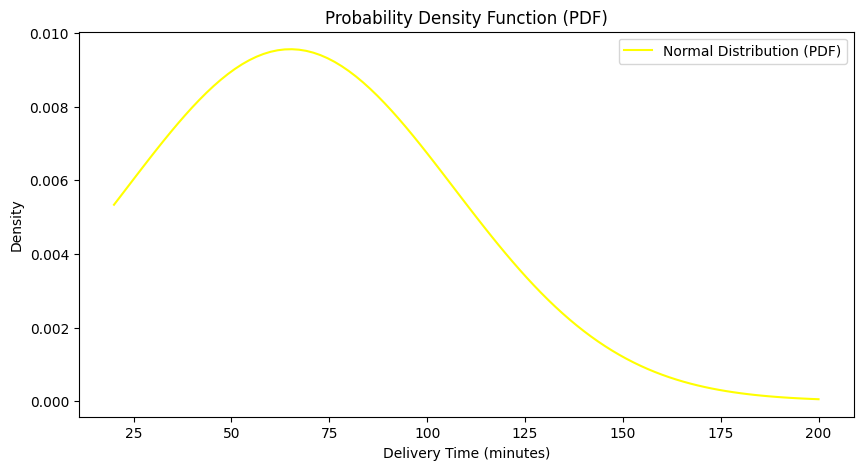

In [97]:
# A company tracks the delivery time (in minutes) for its online orders. You are given the delivery times for 50 orders.
#●	Calculate the mean and standard deviation of the delivery times.
#●	Plot the Probability Density Function (PDF) to visualize the distribution.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

delivery_times= [25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]

mean = np.mean(delivery_times)
std_dev = np.std(delivery_times)
print(f"Mean Delivery Time: {mean}")
print(f"Standard Deviation of Delivery Time: {std_dev}")

# Plotting PDF
x = np.linspace(min(delivery_times),max(delivery_times),100)
pdf = norm.pdf(x,mean,std_dev)
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, color='Yellow', label='Normal Distribution (PDF)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF)')
plt.legend()
plt.show()